##Set environnment and get preprocessed dataset

In [ ]:
!rm -R /usr/local/lib/python3.7/dist-packages/torch

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchtext==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 48.4 MB/s eta 0:00:24tcmalloc: large alloc 1147494400 bytes == 0x556ec0bda000 @  0x7ffa1aa8a615 0x556e86d124cc 0x556e86df247a 0x556e86d152ed 0x556e86e06e1d 0x556e86d88e99 0x556e86d839ee 0x556e86d16bda 0x556e86d88d00 0x556e86d839ee 0x556e86d16bda 0x556e86d85737 0x556e86e07c66 0x556e86d84daf 0x556e86e07c66 0x556e86d84daf 0x556e86e07c66 0x556e86d84daf 0x556e86d17039 0x556e86d5a409 0x556e86d15c52 0x556e86d88c25 0x556e86d839ee 0x556e86d16bda 0x556e86d85737 0x556e86d839ee 0x556e86d16bda 0x556e86d84915 0x556e86d16afa 0x556e86d84c0d 0x556e86d839ee
     |█████████████████               | 1055.7 MB 1.6 MB/s eta 0:09:28tcmalloc: large alloc 1434370048 bytes == 0x556f05230000 @  0x7ffa1aa8a615 0x556e86d124cc 0x556e86df247a 0x556e86d152ed 0x556e86e06e1d 0x556e86d88e99 0x556e86d839ee 0x556e86d16bda 0x556e86d88d00 0x556e86d839ee 0x556e86d16bda 0x556e86d85737 0x556e86e07c66 0x556e86d84

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [ ]:
import torch
print(torch.__version__)
conda install -c anaconda ipykernel
   61  python -m ipykernel install --user --name=timesformer
   62  jupyter notebook --no-browser --port=9250


1.8.0+cu111


In [ ]:
'''!pip install ipython-autotime
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install simplejson
!pip install einops
!pip install timm
!conda install av -c conda-forge
!pip install psutil
!pip install scikit-learn
!pip install opencv-python
!pip install tensorboard
!pip install av'''
%load_ext autotime
import torch
import numpy as np
import pandas as pd
import random as rnd
import os
from google.colab import files
from moviepy.editor import *
import shutil
import matplotlib
from google.colab import drive
import numpy as np
import pandas as pd
import os
from google.colab import files
from moviepy.editor import *
import shutil
import matplotlib.pyplot as plt

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-3ds6xx7g
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-3ds6xx7g
     |████████████████████████████████| 596 kB 5.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65044 sha256=c9acf7ca6af5ee2a5ccbdad51361af16007305d0f9109776ca0518c4fde3bd05
  Stored in directory: /tmp/pip-ephem-wheel-cache-8x2iii32/wheels/1c/80/2d/315cfb0174b5497db94b1a3c33b95db050f9172f1467171992
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 129 kB 5.4 MB/s 
     |████████████████████████████████| 376 kB 5.4 MB/s 
/bin/bash: conda: command not found
     |████████████████████████████████| 37.2 MB 32 kB/s 
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Downloa

In [ ]:
print(torch.__version__)

1.8.0+cu111
time: 1.76 ms (started: 2021-10-28 14:28:36 +00:00)


**Get dataset from drive**

In [ ]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive
time: 1min 41s (started: 2021-10-28 14:28:36 +00:00)


In [ ]:
!unzip /content/gdrive/MyDrive/UCF-101_preprocessed.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g13_c02.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g09_c01.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g01_c02.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g02_c04.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g15_c04.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g04_c04.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g07_c03.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g06_c07.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g17_c04.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g12_c01.avi  
  inflating: content/UCF-101_preprocessed/SumoWrestling/v_SumoWrestling_g03_c02.avi  
  in

In [ ]:
drive.flush_and_unmount()

time: 4.81 s (started: 2021-10-28 14:39:21 +00:00)


**Clone Timesformer Github repository**

In [ ]:
!git clone https://github.com/facebookresearch/TimeSformer
%cd TimeSformer 
!python setup.py build develop

Cloning into 'TimeSformer'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (392/392), done.
remote: Compressing objects: 100% (316/316), done.
remote: Total 392 (delta 177), reused 255 (delta 70), pack-reused 0
Receiving objects: 100% (392/392), 330.85 KiB | 4.30 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/TimeSformer
running build
running build_py
creating build
creating build/lib
creating build/lib/timesformer
copying timesformer/__init__.py -> build/lib/timesformer
creating build/lib/timesformer/config
copying timesformer/config/__init__.py -> build/lib/timesformer/config
copying timesformer/config/defaults.py -> build/lib/timesformer/config
creating build/lib/timesformer/utils
copying timesformer/utils/parser.py -> build/lib/timesformer/utils
copying timesformer/utils/logging.py -> build/lib/timesformer/utils
copying timesformer/utils/benchmark.py -> build/lib/timesformer/utils
copying timesformer/utils/misc.py -> build/lib/timesformer/ut

##Training

###50% training 20% validation 30% test

####Preprocess csv files

**Extraction of validation set from the training set** (To get 50% data for training, 20% for validation and 30% for test)


In [ ]:
f = open("/content/content/UCF-101_preprocessed/train.csv", "r")
f_val = open("/content/content/UCF-101_preprocessed/val.csv", "a")
f_train = open("/content/content/UCF-101_preprocessed/train2.csv", "a")

for x in f:
  if(rnd.random()<=2/7):
    f_val.write("/content/content/UCF-101_preprocessed/"+x)
  else:  
    f_train.write("/content/content/UCF-101_preprocessed/"+x)
f.close()  
f_val.close()
f_train.close()

time: 64.8 ms (started: 2021-10-28 14:39:29 +00:00)


**Modify csv file to have them as requested by Timesformer, move them to the correct position**

In [ ]:
f = open("/content/content/UCF-101_preprocessed/test.csv", "r")
f_test = open("/content/content/UCF-101_preprocessed/test2.csv", "a")
for x in f:
  f_test.write("/content/content/UCF-101_preprocessed/"+x)

f.close()  

time: 21.6 ms (started: 2021-10-28 14:39:30 +00:00)


In [ ]:
os.remove("/content/content/UCF-101_preprocessed/test.csv")
os.remove("/content/content/UCF-101_preprocessed/train.csv")

time: 2.55 ms (started: 2021-10-28 14:39:30 +00:00)


In [ ]:
os.rename("/content/content/UCF-101_preprocessed/train2.csv", "/content/content/UCF-101_preprocessed/train.csv")
os.rename("/content/content/UCF-101_preprocessed/test2.csv", "/content/content/UCF-101_preprocessed/test.csv")

time: 2.22 ms (started: 2021-10-28 14:39:30 +00:00)


**Check label distribution in training and validation set**


In [ ]:
def get_labels(file):
  f = open(file, "r")
  label = np.zeros(101)
  for x in f:
    l = int(x.split(" ")[1])
    label[l-1] += 1
  return label  

time: 6.28 ms (started: 2021-10-28 14:39:30 +00:00)


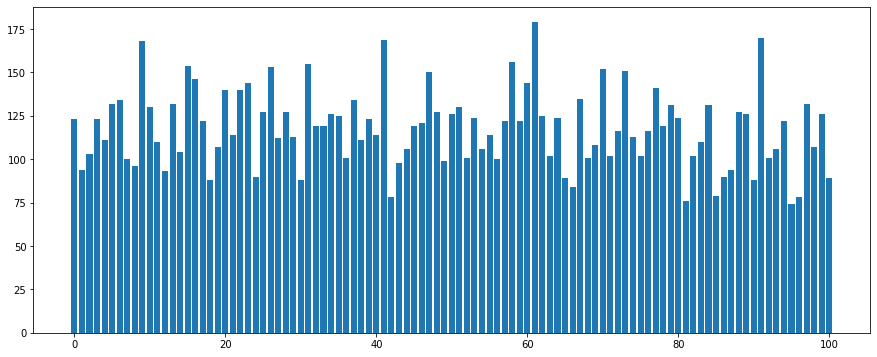

time: 741 ms (started: 2021-10-28 14:39:30 +00:00)


In [ ]:
train_label = get_labels("/content/content/UCF-101_preprocessed/train.csv")
val_label = get_labels("/content/content/UCF-101_preprocessed/val.csv")

diff = train_label-val_label

plt.figure(figsize=[15, 6])
#plt.subplot(1,2,1)
#plt.bar(np.arange(101), train_label)
#plt.subplot(1,2,2)
#plt.bar(np.arange(101), val_label)
plt.bar(np.arange(101), diff)
plt.show()

####Training

w.r.t. the original parameters there have been made some changes:
- NUM_GPUS is set to 1 (instead of 8, Colab doesn't support the usage of multiple GPUs)
- TRAIN.BATCH_SIZE is set to 4 (the original value of 8 caused a Cuda error due to the lack of memory)
- DATA_LOADER.NUM_WORKERS is set to 2 (the original value raised a Warning message)

***timesformer/utils/parser.py***

In [ ]:
import argparse
import sys

import timesformer.utils.checkpoint as cu
from timesformer.config.defaults import get_cfg
"""
Given the arguemnts, load and initialize the configs.
Args:
  args (argument): arguments includes `shard_id`, `num_shards`,
  `init_method`, `cfg_file`, and `opts`.
"""
# Setup cfg.
cfg = get_cfg()
# Load config from cfg.
#if args.cfg_file is not None:
  #update parametri qui
cfg.merge_from_file("configs/Kinetics/TimeSformer_divST_8x32_224.yaml")
cfg.DATA.PATH_TO_DATA_DIR = '/content/content/UCF-101_preprocessed'
cfg.NUM_GPUS = 1
cfg.TRAIN.BATCH_SIZE = 2
cfg.DATA_LOADER.NUM_WORKERS = 2
# Load config from command line, overwrite config from opts.
#if args.opts is not None:
print(cfg)
#cfg.merge_from_list(args.opts)

# Inherit parameters from args.

#cfg.NUM_SHARDS = args.num_shards
#cfg.SHARD_ID = args.shard_id

#cfg.RNG_SEED = args.rng_seed

cfg.OUTPUT_DIR = "/content/output"

# Create the checkpoint dir.
cu.make_checkpoint_dir(cfg.OUTPUT_DIR)


AVA:
  ANNOTATION_DIR: /mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/
  BGR: False
  DETECTION_SCORE_THRESH: 0.9
  EXCLUSION_FILE: ava_val_excluded_timestamps_v2.2.csv
  FRAME_DIR: /mnt/fair-flash3-east/ava_trainval_frames.img/
  FRAME_LIST_DIR: /mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: ava_val_v2.2.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: ava_action_list_v2.2_for_activitynet_2019.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['val.csv']
  TEST_PREDICT_BOX_LISTS: ['ava_val_predicted_boxes.csv']
  TRAIN_GT_BOX_LISTS: ['ava_train_v2.2.csv']
  TRAIN_LISTS: ['train.csv']
  TRAIN_PCA_EIGVAL: [0.225, 0.224, 0.229]
  TRAIN_PCA_EIGVEC: [[-0.5675, 0.7192, 0.4009], [-0.5808, -0.0045, -0.814], [-0.5836, -0.6948, 0.4203]]
  TRAIN_PCA_JITTER_ONLY: True
  TRAIN_PREDICT_BOX_LISTS: []
  TRAIN_USE_COLOR_AUGMENTATION: False
BENCHMARK:
  LOG_PERIOD: 100
  NUM_EPOCHS: 5
  SHUFFLE: True
BN:
  NORM_TYPE: batchnorm

'/content/output/checkpoints'

time: 122 ms (started: 2021-10-28 14:39:30 +00:00)


***timesformer/datasets/loader.py***

In [ ]:
import itertools
import numpy as np
import torch
from torch.utils.data._utils.collate import default_collate
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data.sampler import RandomSampler

#from timesformer.datasets.multigrid_helper import ShortCycleBatchSampler

from timesformer.datasets import utils
from timesformer.datasets.build import build_dataset

def detection_collate(batch):
    """
    Collate function for detection task. Concatanate bboxes, labels and
    metadata from different samples in the first dimension instead of
    stacking them to have a batch-size dimension.
    Args:
        batch (tuple or list): data batch to collate.
    Returns:
        (tuple): collated detection data batch.
    """
    inputs, labels, video_idx, extra_data = zip(*batch)
    inputs, video_idx = default_collate(inputs), default_collate(video_idx)
    labels = torch.tensor(np.concatenate(labels, axis=0)).float()

    collated_extra_data = {}
    for key in extra_data[0].keys():
        data = [d[key] for d in extra_data]
        if key == "boxes" or key == "ori_boxes":
            # Append idx info to the bboxes before concatenating them.
            bboxes = [
                np.concatenate(
                    [np.full((data[i].shape[0], 1), float(i)), data[i]], axis=1
                )
                for i in range(len(data))
            ]
            bboxes = np.concatenate(bboxes, axis=0)
            collated_extra_data[key] = torch.tensor(bboxes).float()
        elif key == "metadata":
            collated_extra_data[key] = torch.tensor(
                list(itertools.chain(*data))
            ).view(-1, 2)
        else:
            collated_extra_data[key] = default_collate(data)

    return inputs, labels, video_idx, collated_extra_data

def construct_loader1(cfg, split, is_precise_bn=False):
    """
    Constructs the data loader for the given dataset.
    Args:
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
        split (str): the split of the data loader. Options include `train`,
            `val`, and `test`.
    """
    assert split in ["train", "val", "test"]
    if split in ["train"]:
        dataset_name = cfg.TRAIN.DATASET
        batch_size = int(cfg.TRAIN.BATCH_SIZE / max(1, cfg.NUM_GPUS))
        shuffle = True
        drop_last = True
    elif split in ["val"]:
        dataset_name = cfg.TRAIN.DATASET
        batch_size = int(cfg.TRAIN.BATCH_SIZE / max(1, cfg.NUM_GPUS))
        shuffle = False
        drop_last = False
    elif split in ["test"]:
        dataset_name = cfg.TEST.DATASET
        batch_size = int(cfg.TEST.BATCH_SIZE / max(1, cfg.NUM_GPUS))
        shuffle = False
        drop_last = False

    # Construct the dataset
    dataset = build_dataset(dataset_name, cfg, split)

    if cfg.MULTIGRID.SHORT_CYCLE and split in ["train"] and not is_precise_bn:
        # Create a sampler for multi-process training
        sampler = utils.create_sampler(dataset, shuffle, cfg)
        batch_sampler = ShortCycleBatchSampler(
            sampler, batch_size=batch_size, drop_last=drop_last, cfg=cfg
        )
        # Create a loader
        loader = torch.utils.data.DataLoader(
            dataset,
            batch_sampler=batch_sampler,
            num_workers=cfg.DATA_LOADER.NUM_WORKERS,
            pin_memory=cfg.DATA_LOADER.PIN_MEMORY,
            worker_init_fn=utils.loader_worker_init_fn(dataset),
        )
    else:
        # Create a sampler for multi-process training
        sampler = utils.create_sampler(dataset, shuffle, cfg)
        # Create a loader
        loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=(False if sampler else shuffle),
            sampler=sampler,
            num_workers=cfg.DATA_LOADER.NUM_WORKERS,
            pin_memory=cfg.DATA_LOADER.PIN_MEMORY,
            drop_last=drop_last,
            collate_fn=detection_collate if cfg.DETECTION.ENABLE else None,
            worker_init_fn=utils.loader_worker_init_fn(dataset),
        )
    return loader


def shuffle_dataset(loader, cur_epoch):
    """ "
    Shuffles the data.
    Args:
        loader (loader): data loader to perform shuffle.
        cur_epoch (int): number of the current epoch.
    """
    sampler = (
        loader.batch_sampler.sampler
        if isinstance(loader.batch_sampler, ShortCycleBatchSampler)
        else loader.sampler
    )
    assert isinstance(
        sampler, (RandomSampler, DistributedSampler)
    ), "Sampler type '{}' not supported".format(type(sampler))
    # RandomSampler handles shuffling automatically
    if isinstance(sampler, DistributedSampler):
        # DistributedSampler shuffles data based on epoch
        sampler.set_epoch(cur_epoch)    

time: 1.37 s (started: 2021-10-28 14:39:32 +00:00)


***tools/train_net.py***

In [ ]:
import numpy as np
import pprint
import torch
from fvcore.nn.precise_bn import get_bn_modules, update_bn_stats

import timesformer.models.losses as losses
import timesformer.models.optimizer as optim
import timesformer.utils.checkpoint as cu
import timesformer.utils.distributed as du
import timesformer.utils.logging as logging
import timesformer.utils.metrics as metrics
import timesformer.utils.misc as misc
import timesformer.visualization.tensorboard_vis as tb
from timesformer.datasets import loader
from timesformer.models import build_model
from timesformer.utils.meters import TrainMeter, ValMeter
from timesformer.utils.multigrid import MultigridSchedule
from tools import train_net
from timm.data import Mixup
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy

logger = logging.get_logger(__name__)
 
def train_epoch1(
    train_loader, model, optimizer, train_meter, cur_epoch, cfg, writer=None
):
    """
    Perform the video training for one epoch.
    Args:
        train_loader (loader): video training loader.
        model (model): the video model to train.
        optimizer (optim): the optimizer to perform optimization on the model's
            parameters.
        train_meter (TrainMeter): training meters to log the training performance.
        cur_epoch (int): current epoch of training.
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
        writer (TensorboardWriter, optional): TensorboardWriter object
            to writer Tensorboard log.
    """
    # Enable train mode.
    model.train()
    train_meter.iter_tic()
    data_size = len(train_loader)

    cur_global_batch_size = cfg.NUM_SHARDS * cfg.TRAIN.BATCH_SIZE
    num_iters = cfg.GLOBAL_BATCH_SIZE // cur_global_batch_size

    for cur_iter, (inputs, labels, _, meta) in enumerate(train_loader):
        
        print("labels") #qui label giuste
        print(labels)
        print(inputs.shape)
        torch.swapaxes(inputs, 1, 2)
        torch.swapaxes(inputs, 2, 4)
        torch.swapaxes(inputs, 2, 3)
        #2,3,8,224,224

        fig, ax = plt.subplots(nrows=2,ncols=8)
        for row in ax:
          for col in row:
            col.imshow(inputs[row][col].numpy())
        
        # Transfer the data to the current GPU device.
        if cfg.NUM_GPUS:
            if isinstance(inputs, (list,)):
                for i in range(len(inputs)):
                    inputs[i] = inputs[i].cuda(non_blocking=True)
            else:
                inputs = inputs.cuda(non_blocking=True)
            labels = labels.cuda()
            print(labels)
            for key, val in meta.items():
                if isinstance(val, (list,)):
                    for i in range(len(val)):
                        val[i] = val[i].cuda(non_blocking=True)
                else:
                    meta[key] = val.cuda(non_blocking=True)

        # Update the learning rate.
        lr = optim.get_epoch_lr(cur_epoch + float(cur_iter) / data_size, cfg)
        optim.set_lr(optimizer, lr)

        train_meter.data_toc()

        # Explicitly declare reduction to mean.
        if not cfg.MIXUP.ENABLED:
           loss_fun = losses.get_loss_func(cfg.MODEL.LOSS_FUNC)(reduction="mean")
        else:
           mixup_fn = Mixup(
               mixup_alpha=cfg.MIXUP.ALPHA, cutmix_alpha=cfg.MIXUP.CUTMIX_ALPHA, cutmix_minmax=cfg.MIXUP.CUTMIX_MINMAX, prob=cfg.MIXUP.PROB, switch_prob=cfg.MIXUP.SWITCH_PROB, mode=cfg.MIXUP.MODE,
               label_smoothing=0.1, num_classes=cfg.MODEL.NUM_CLASSES)
           hard_labels = labels
           inputs, labels = mixup_fn(inputs, labels)
           print(labels)
           loss_fun = SoftTargetCrossEntropy()

        if cfg.DETECTION.ENABLE:
            preds = model(inputs, meta["boxes"])
        else:
            print(type(model))
            preds = model(inputs)
            print("preds")
            print(preds)

        # Compute the loss.
        loss = loss_fun(preds, labels)
        print(loss)

        if cfg.MIXUP.ENABLED:
            labels = hard_labels

        # check Nan Loss.
        misc.check_nan_losses(loss)


        if cur_global_batch_size >= cfg.GLOBAL_BATCH_SIZE:
            # Perform the backward pass.
            optimizer.zero_grad()
            loss.backward()
            # Update the parameters.
            optimizer.step()
        else:
            if cur_iter == 0:
                optimizer.zero_grad()
            loss.backward()
            if (cur_iter + 1) % num_iters == 0:
                for p in model.parameters():
                    p.grad /= num_iters
                optimizer.step()
                optimizer.zero_grad()

        if cfg.DETECTION.ENABLE:
            if cfg.NUM_GPUS > 1:
                loss = du.all_reduce([loss])[0]
            loss = loss.item()

            # Update and log stats.
            train_meter.update_stats(None, None, None, loss, lr)
            # write to tensorboard format if available.
            if writer is not None:
                writer.add_scalars(
                    {"Train/loss": loss, "Train/lr": lr},
                    global_step=data_size * cur_epoch + cur_iter,
                )

        else:
            top1_err, top5_err = None, None
            if cfg.DATA.MULTI_LABEL:
                # Gather all the predictions across all the devices.
                if cfg.NUM_GPUS > 1:
                    [loss] = du.all_reduce([loss])
                loss = loss.item()
            else:
                # Compute the errors.
                num_topks_correct = metrics.topks_correct(preds, labels, (1, 5))
                top1_err, top5_err = [
                    (1.0 - x / preds.size(0)) * 100.0 for x in num_topks_correct
                ]
                # Gather all the predictions across all the devices.
                if cfg.NUM_GPUS > 1:
                    loss, top1_err, top5_err = du.all_reduce(
                        [loss, top1_err, top5_err]
                    )

                # Copy the stats from GPU to CPU (sync point).
                loss, top1_err, top5_err = (
                    loss.item(),
                    top1_err.item(),
                    top5_err.item(),
                )

            # Update and log stats.
            train_meter.update_stats(
                top1_err,
                top5_err,
                loss,
                lr,
                inputs[0].size(0)
                * max(
                    cfg.NUM_GPUS, 1
                ),  # If running  on CPU (cfg.NUM_GPUS == 1), use 1 to represent 1 CPU.
            )
            # write to tensorboard format if available.
            if writer is not None:
                writer.add_scalars(
                    {
                        "Train/loss": loss,
                        "Train/lr": lr,
                        "Train/Top1_err": top1_err,
                        "Train/Top5_err": top5_err,
                    },
                    global_step=data_size * cur_epoch + cur_iter,
                )

        train_meter.iter_toc()  # measure allreduce for this meter
        train_meter.log_iter_stats(cur_epoch, cur_iter)
        train_meter.iter_tic()

    # Log epoch stats.
    train_meter.log_epoch_stats(cur_epoch)
    train_meter.reset()

def train1(cfg):
    """
    Train a video model for many epochs on train set and evaluate it on val set.
    Args:
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
    """
    # Set up environment.
    du.init_distributed_training(cfg) #do nothing if NUM_GPUS<=1
    # Set random seed from configs.
    np.random.seed(cfg.RNG_SEED)
    torch.manual_seed(cfg.RNG_SEED)

    # Setup logging format.
    logging.setup_logging(cfg.OUTPUT_DIR)

    # Init multigrid.
    multigrid = None
    if cfg.MULTIGRID.LONG_CYCLE or cfg.MULTIGRID.SHORT_CYCLE: #both false in our case
        multigrid = MultigridSchedule()
        cfg = multigrid.init_multigrid(cfg)
        if cfg.MULTIGRID.LONG_CYCLE:
            cfg, _ = multigrid.update_long_cycle(cfg, cur_epoch=0)
    # Print config.
    logger.info("Train with config:")
    logger.info(pprint.pformat(cfg))

    # Build the video model and print model statistics.
    model = build_model(cfg)
    if du.is_master_proc() and cfg.LOG_MODEL_INFO: #false in our case
        misc.log_model_info(model, cfg, use_train_input=True)

    # Construct the optimizer.
    optimizer = optim.construct_optimizer(model, cfg)

    # Load a checkpoint to resume training if applicable.
    if not cfg.TRAIN.FINETUNE:
      start_epoch = cu.load_train_checkpoint(cfg, model, optimizer)
    else:
      start_epoch = 0
      cu.load_checkpoint(cfg.TRAIN.CHECKPOINT_FILE_PATH, model)

    # Create the video train and val loaders.
    train_loader = construct_loader1(cfg, "train")
    val_loader = construct_loader1(cfg, "val")

    precise_bn_loader = (
        construct_loader1(cfg, "train", is_precise_bn=True)
        if cfg.BN.USE_PRECISE_STATS
        else None
    )

    train_meter = TrainMeter(len(train_loader), cfg)
    val_meter = ValMeter(len(val_loader), cfg)

    # set up writer for logging to Tensorboard format.
    if cfg.TENSORBOARD.ENABLE and du.is_master_proc(
        cfg.NUM_GPUS * cfg.NUM_SHARDS
    ):
        writer = tb.TensorboardWriter(cfg)
    else:
        writer = None

    # Perform the training loop.
    logger.info("Start epoch: {}".format(start_epoch + 1))

    for cur_epoch in range(start_epoch, cfg.SOLVER.MAX_EPOCH):
        if cfg.MULTIGRID.LONG_CYCLE:
            cfg, changed = multigrid.update_long_cycle(cfg, cur_epoch)
            if changed:
                (
                    model,
                    optimizer,
                    train_loader,
                    val_loader,
                    precise_bn_loader,
                    train_meter,
                    val_meter,
                ) = build_trainer(cfg)

                # Load checkpoint.
                if cu.has_checkpoint(cfg.OUTPUT_DIR):
                    last_checkpoint = cu.get_last_checkpoint(cfg.OUTPUT_DIR)
                    assert "{:05d}.pyth".format(cur_epoch) in last_checkpoint
                else:
                    last_checkpoint = cfg.TRAIN.CHECKPOINT_FILE_PATH
                logger.info("Load from {}".format(last_checkpoint))
                cu.load_checkpoint(
                    last_checkpoint, model, cfg.NUM_GPUS > 1, optimizer
                )

        # Shuffle the dataset.
        loader.shuffle_dataset(train_loader, cur_epoch)

        # Train for one epoch.
        train_epoch1(
            train_loader, model, optimizer, train_meter, cur_epoch, cfg, writer
        )

        is_checkp_epoch = cu.is_checkpoint_epoch(
            cfg,
            cur_epoch,
            None if multigrid is None else multigrid.schedule,
        )
        is_eval_epoch = misc.is_eval_epoch(
            cfg, cur_epoch, None if multigrid is None else multigrid.schedule
        )

        # Compute precise BN stats.
        if (
            (is_checkp_epoch or is_eval_epoch)
            and cfg.BN.USE_PRECISE_STATS
            and len(get_bn_modules(model)) > 0
        ):
            calculate_and_update_precise_bn(
                precise_bn_loader,
                model,
                min(cfg.BN.NUM_BATCHES_PRECISE, len(precise_bn_loader)),
                cfg.NUM_GPUS > 0,
            )
        _ = misc.aggregate_sub_bn_stats(model)

        # Save a checkpoint.
        if is_checkp_epoch:
            cu.save_checkpoint(cfg.OUTPUT_DIR, model, optimizer, cur_epoch, cfg)
        # Evaluate the model on validation set.
        if is_eval_epoch:
            eval_epoch(val_loader, model, val_meter, cur_epoch, cfg, writer)

    if writer is not None:
        writer.close()

**tools/run_net.py**

[10/22 09:53:37][INFO] <ipython-input-36-0613b81cdc70>: 240: Train with config:
[10/22 09:53:37][INFO] <ipython-input-36-0613b81cdc70>: 241: {'AVA': {'ANNOTATION_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.9,
         'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.2.csv',
         'FRAME_DIR': '/mnt/fair-flash3-east/ava_trainval_frames.img/',
         'FRAME_LIST_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'ava_val_v2.2.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt',
         'TEST_FORCE_FLIP': False,
         'TEST_LISTS': ['val.csv'],
         'TEST_PREDICT_BOX_LISTS': ['ava_val_predicted_boxes.csv'],
         'TRAIN_GT_BOX_LISTS': ['ava_train_v2.2.csv'],
         'TRAIN_LISTS': ['train.csv'],
         'TRAIN_PCA_EIGVAL': [0

TypeError: ignored

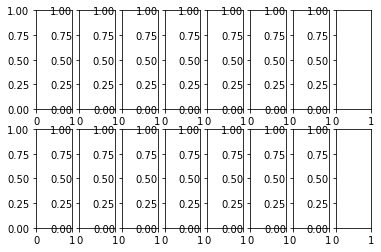

time: 1min 24s (started: 2021-10-22 09:53:37 +00:00)


In [ ]:
"""Wrapper to train and test a video classification model."""
from timesformer.utils.misc import launch_job
from timesformer.utils.parser import load_config, parse_args

from tools.test_net import test
from tools.train_net import train


def get_func(cfg):
    train_func = train
    test_func = test
    return train_func, test_func

"""
    Main function to spawn the train and test process.
"""
#args = parse_args()
#if args.num_shards > 1:
#    args.output_dir = str(args.job_dir)
#cfg = load_config(args)

#train, test = get_func(cfg)

# Perform training.
#if cfg.TRAIN.ENABLE:
    #launch_job(cfg=cfg, init_method=args.init_method, func=train)
train1(cfg)

""" # Perform multi-clip testing.
if cfg.TEST.ENABLE:
    launch_job(cfg=cfg, init_method=args.init_method, func=test)

# Perform model visualization.
if cfg.TENSORBOARD.ENABLE and (
    cfg.TENSORBOARD.MODEL_VIS.ENABLE
    or cfg.TENSORBOARD.WRONG_PRED_VIS.ENABLE
):
    launch_job(cfg=cfg, init_method=args.init_method, func=visualize)"""

In [ ]:
  !nvidia-smi

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

time: 429 ms (started: 2021-10-22 10:01:23 +00:00)


In [ ]:
! python tools/run_net.py \
  --cfg configs/Kinetics/TimeSformer_divST_8x32_224.yaml \
  DATA.PATH_TO_DATA_DIR  /content/content/UCF-101_preprocessed \
  NUM_GPUS 1 \
  TRAIN.BATCH_SIZE 4 \
  DATA_LOADER.NUM_WORKERS 2 \